<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/PowerSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Power 시리즈

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
tf.__version__

'2.5.0'

In [ ]:
def graph(w_number, x_number, step_number):
    %%time
    y = 1
    yprime = 0
    x = tf.Variable(tf.random_normal([x_number]), name = 'x')
    
    for i in range(1, w_number + 1):
        globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
        y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
        yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    
    cost = tf.reduce_mean(tf.square(yprime - y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
    train = optimizer.minimize(cost)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for step in range(step_number + 1):
        for i in range(1, w_number + 1):
            globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
        cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
        if step % int(step_number / 5) == 0:
    #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
            print(step, "Cost: ", cost_val, "\n")
            print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
            
    def y(x):
        answer = 1
        for i in range(1, w_number + 1):
            answer += globals()['w{}_val'.format(i)]*(x**i)
        return answer[0]
    
    globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
    plt.plot(x_val, y(x_val), '.')
    plt.show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
0 Cost:  222.55373 

w1:  [array([-1.6274484], dtype=float32)] w2:  [array([1.6442195], dtype=float32)] w3:  [array([0.85651195], dtype=float32)] w4:  [array([-0.35377035], dtype=float32)] w5:  [array([0.5972331], dtype=float32)] w6:  [array([0.21052586], dtype=float32)] 

6000 Cost:  5.051987 

w1:  [array([-1.3900592], dtype=float32)] w2:  [array([1.4783907], dtype=float32)] w3:  [array([0.8532944], dtype=float32)] w4:  [array([-0.42095324], dtype=float32)] w5:  [array([-0.06419628], dtype=float32)] w6:  [array([0.03889411], dtype=float32)] 

12000 Cost:  3.8841717 

w1:  [array([-1.2043784], dtype=float32)] w2:  [array([1.3584106], dtype=float32)] w3:  [array([0.87857157], dtype=float32)] w4:  [array([-0.39106834], dtype=float32)] w5:  [array([-0.07342355], dtype=float32)] w6:  [array([0.03988887], dtype=float32)] 

18000 Cost:  3.040623 

w1:  [array([-1.0460738], dtype=float32)] w2:  [array([1.261293], dtype=float32)]

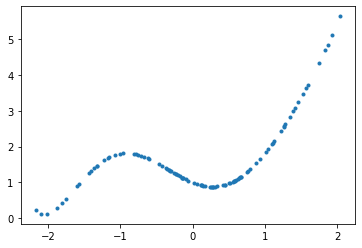

In [ ]:
graph(6, 100, 30000)

0 Cost:  1674.1755 

w1:  [array([0.22503605], dtype=float32)] w2:  [array([-0.29615358], dtype=float32)] w3:  [array([0.4226972], dtype=float32)] w4:  [array([-0.33600375], dtype=float32)] w5:  [array([0.47519094], dtype=float32)] w6:  [array([-0.09891133], dtype=float32)] 

6000 Cost:  0.36330044 

w1:  [array([0.19052328], dtype=float32)] w2:  [array([-0.13934608], dtype=float32)] w3:  [array([0.21961175], dtype=float32)] w4:  [array([0.10837085], dtype=float32)] w5:  [array([-0.00412909], dtype=float32)] w6:  [array([-0.00372566], dtype=float32)] 

12000 Cost:  0.3304314 

w1:  [array([0.22183777], dtype=float32)] w2:  [array([-0.11581508], dtype=float32)] w3:  [array([0.20155239], dtype=float32)] w4:  [array([0.10962896], dtype=float32)] w5:  [array([-0.00163829], dtype=float32)] w6:  [array([-0.00398772], dtype=float32)] 

18000 Cost:  0.30439955 

w1:  [array([0.2540354], dtype=float32)] w2:  [array([-0.09598428], dtype=float32)] w3:  [array([0.19178708], dtype=float32)] w4:  [a

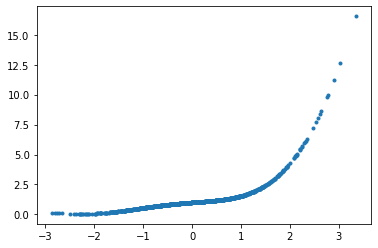

In [ ]:
graph(6, 1000, 30000)

0 Cost:  16542.277 

w1:  [array([-0.17550696], dtype=float32)] w2:  [array([-0.5823108], dtype=float32)] w3:  [array([0.5545456], dtype=float32)] w4:  [array([0.32682055], dtype=float32)] w5:  [array([-0.38329548], dtype=float32)] w6:  [array([0.40438274], dtype=float32)] 

6000 Cost:  1.0762184 

w1:  [array([-0.17120807], dtype=float32)] w2:  [array([-0.5098731], dtype=float32)] w3:  [array([0.40481502], dtype=float32)] w4:  [array([0.21737936], dtype=float32)] w5:  [array([-0.02148394], dtype=float32)] w6:  [array([-0.01062955], dtype=float32)] 

12000 Cost:  0.8266081 

w1:  [array([-0.14569058], dtype=float32)] w2:  [array([-0.45367083], dtype=float32)] w3:  [array([0.310754], dtype=float32)] w4:  [array([0.17464685], dtype=float32)] w5:  [array([-0.01525361], dtype=float32)] w6:  [array([-0.00818765], dtype=float32)] 

18000 Cost:  0.7159659 

w1:  [array([-0.11038312], dtype=float32)] w2:  [array([-0.40935737], dtype=float32)] w3:  [array([0.25881326], dtype=float32)] w4:  [arr

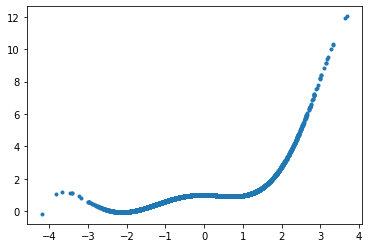

In [ ]:
graph(6, 10000, 30000)

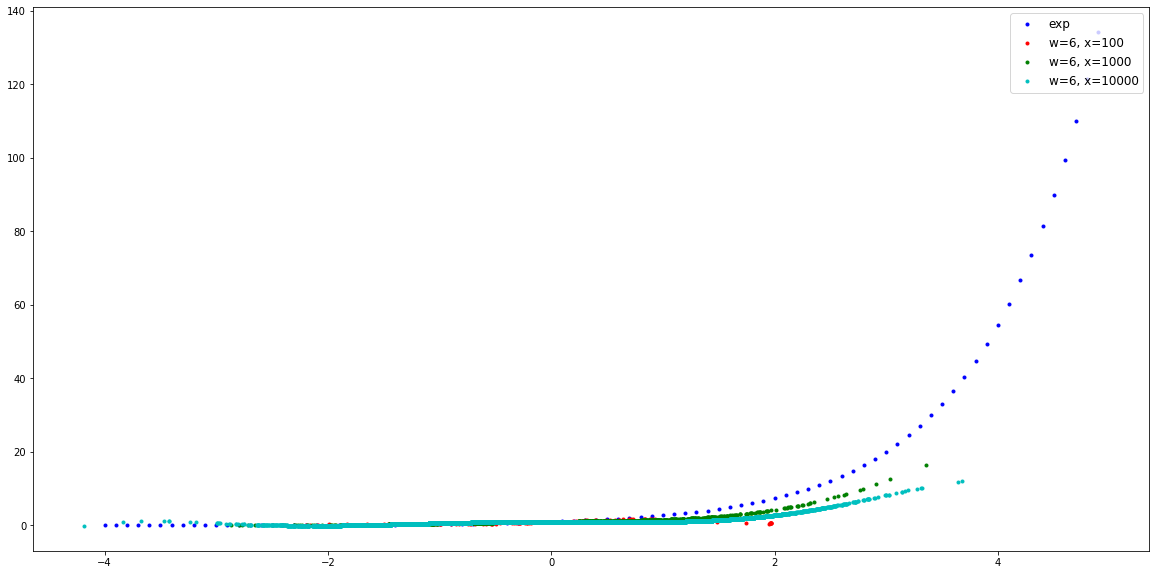

In [ ]:
x = np.array([i for i in range(-40, 50, 1)])
plt.figure(figsize = (20, 10))
plt.plot(0.1*x, np.exp(0.1*x), '.b', label = 'exp')
plt.plot(w6x100[0],w6x100[1], '.r', label = 'w=6, x=100')
plt.plot(w6x1000[0],w6x1000[1], '.g', label = 'w=6, x=1000')
plt.plot(w6x10000[0],w6x10000[1], '.c', label = 'w=6, x=10000')
plt.legend(loc = 'upper right', fontsize = 'large')

plt.show()